CA2 Advanced Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import*
from matplotlib import colors
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv
%matplotlib inline
np.random.seed(9191)
import pymc
import scipy.stats as stats
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform

In [2]:
pd.set_option('display.max_row', 2)

### 1. Bayes theorem practice Use Bayes theorem to solve the following problem: 

Bayes theorem practice. Showing your workings, calculate the right answer in your notebook (10 marks)

A woman takes either the bus or taxi to her job. 2/3rds of the time she takes the bus to work, and 1/3rd of the time she takes a taxi. If she takes a taxi, she is at work on time with probability 0.99. If she takes bus, she is at work on time with probability 0.85. Given that she was on time on a particular morning, what is the probability that she took a taxi that morning? Show your calculations

bayes theorem:

p(A|B) = (p(B|A)p(A))\ p(B) 

       =  p(B|A)p(A)\ (p(B|A)p(A)+p(B|notA)p(notA))
	         	        
 
p(B)      = p(B|A)p(A) p(B|notA)p(notA)
         is  p(A intersection B) + p (notA intersection B)



So:


p(Taxi) = 0.33 p(A)
p(NotTaxi)=0.66

p(OnTime|Taxi) =0.99 p(B|A)

p(OnTime|Bus) = p(OnTime|NotTaxi) =0.85  : p(B|~A)

p(OnTime)  =    p(OnTime|Taxi)  +  p(OnTime|NotTaxi) : p(B)


p(Taxi|OnTime) = (0.99)(0.33) \ ((0.99)(0.33)+(0.85)(0.66))
  
		       = 0.3267 \(0.3267+0.561)

               = 0.3267\0.8877

                =0.368


In [3]:
#and in python:
prior_taxi = 0.33  

prior_bus = 0.66


likelihood_on_time_taxi = 0.99

likelihood_on_time_bus = 0.85


evidence = ((likelihood_on_time_taxi)*(prior_taxi)) + ((likelihood_on_time_bus)*(prior_bus))


posterior = ((likelihood_on_time_taxi)*(prior_taxi))/evidence

print posterior, '= probability she took a taxi this morning given she was on time'

0.368029739777 = probability she took a taxi this morning given she was on time


.

### 2. Elementary inference of the parameters of a normal
Using PYMC, calculate the posterior values for mean height and some measure of deviation,
each of men and women using this dataset:
https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv
Plot the posterior mean and deviation for men and for women.
Get your prior here: http://www.usablestats.com/lessons/normal

For example, adult male heights are on average 70 inches  (5'10)/(175cm) with a standard deviation of 4 inches(10cm). Adult women are on average a bit shorter and less variable in height with a mean height of 65  inches (5'5)(162.5cm) and standard deviation of 3.5 inches. (8.75cm)

Note my conversions to cm all rounded ie 4"=10cm , 3.5"=8.75cm, 5'10"=175cm, 5'5"= 162.5cm 


In [4]:
df_data = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv',sep=';', header=0, names=('height','weight','age','male'))
# or if no internet: df_data = pd.read_csv('CA2_data.csv')

df_data.head(20)
#len(df_data)


,height,weight,age,male
0,151.765,47.825606,63.0,1
...,...,...,...,...
19,105.410,13.947954,8.0,0


In [5]:
df_male = df_data[(df_data.male==1)]
df_male
len(df_male)

257

In [6]:
df_male = df_data[(df_data.male==1)]
df_male

,height,weight,age,male
0,151.765,47.825606,63.0,1
...,...,...,...,...
543,158.750,52.531624,68.0,1


In [7]:
df_female = df_data[(df_data.male==0)]
df_female
len(df_female)

287

In [8]:
df_female = df_data[(df_data.male==0)]
df_female

,height,weight,age,male
1,139.70,36.485807,63.0,0
...,...,...,...,...
541,156.21,54.062496,21.0,0


In [9]:
tau = 1./(10**2)
print tau
print (1.0/tau)
print np.sqrt(1.0/tau)

0.01
100.0
10.0


 [-----------------100%-----------------] 51000 of 51000 complete in 7.2 sec

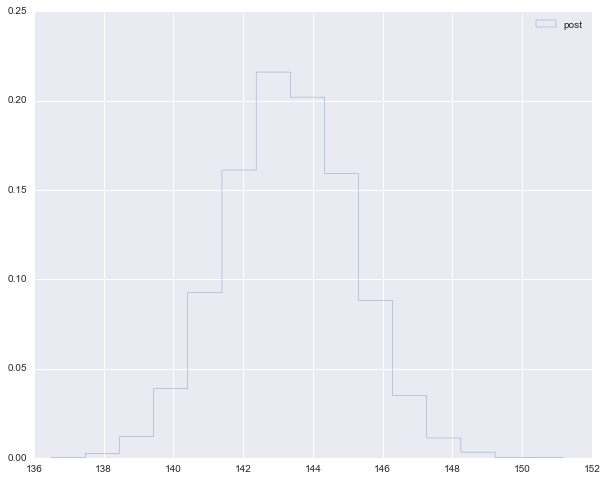

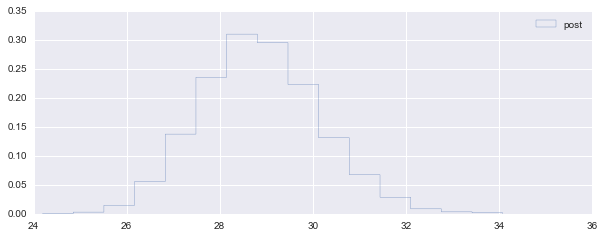

In [14]:
#male data 

y = df_male.height
mu = 175
tau = 1./(10**2)


mu = pymc.Normal('mu', mu=mu,tau=tau)
tau = pymc.Normal('tau')

#define likelihood
y_obs = pymc.Normal('Y_obs', mu=mu, tau=tau, value=y, observed=True)

#inference
m = pymc.Model([y_obs, mu, tau])
mc = pymc.MCMC(m)
mc.sample(iter=51000, burn=10000)
          



    
plt.figure(figsize=(10,8))
plt.subplot(111)
plt.hist(mu.trace(), 15, normed=True, histtype ='step', label ='post');
plt.legend(loc='best');
          
plt.figure(figsize=(10, 8))
plt.subplot(212)
plt.hist(np.sqrt(1.0/tau.trace()), 15, normed=True, histtype ='step', label ='post'); # adjust tau to revert to sd
plt.legend(loc='best');


 [-----------------100%-----------------] 51000 of 51000 complete in 7.0 sec

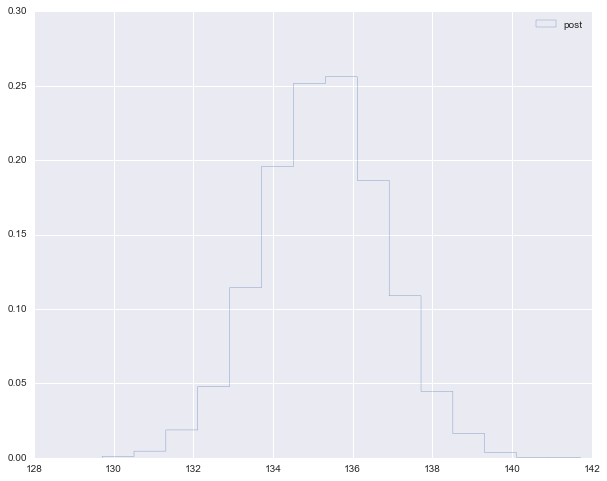

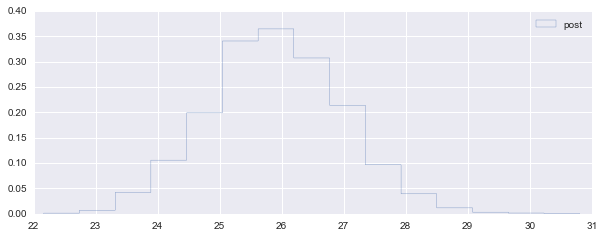

In [15]:
# female data  

y = df_female.height
mu = 162.5
tau = 1./(10**2)

mu = pymc.Normal('mu', mu=mu,tau=tau)
tau = pymc.Normal('tau')

#define likelihood
y_obs = pymc.Normal('Y_obs', mu=mu, tau=tau, value=y, observed=True)

#inference
m = pymc.Model([y_obs, mu, tau])
mc = pymc.MCMC(m)
mc.sample(iter=51000, burn=10000)
          

plt.figure(figsize=(10,8))
plt.subplot(111)
plt.hist(mu.trace(), 15, histtype='step', normed=True, label ='post');
plt.legend(loc='best');
          
plt.figure(figsize=(10, 8))
plt.subplot(212)
plt.hist(np.sqrt(1.0/tau.trace()), 15, histtype='step', normed=True, label ='post');
plt.legend(loc='best');

.

###   3. Beta binomial inference
    A strange device emits the following signals:
    [true, false, true, true, true, true, false, false]
    Assuming a uniform prior, use pymc to plot the posterior distribution (as described by a beta
    distribution) of the chance that the next signal emitted is ‘false’
    What is the maximum you would rationally pay, to win $30 if the next signal emitted is ‘false’?

In [16]:
# Beta binomial inference

n = 8  # total number signals
f = 3  # total number of falses
alpha = 1
beta = 1

p = pymc.Beta('p', alpha=alpha, beta=beta)  #Alpha and Beta equal to 1 will give uniform prior distribution 
y = pymc.Binomial('y', n=n, p=p, value=f, observed=True)
m = pymc.Model([p, y])
mc = pymc.MCMC(m, )

 [-----------------100%-----------------] 51000 of 51000 complete in 3.8 sec

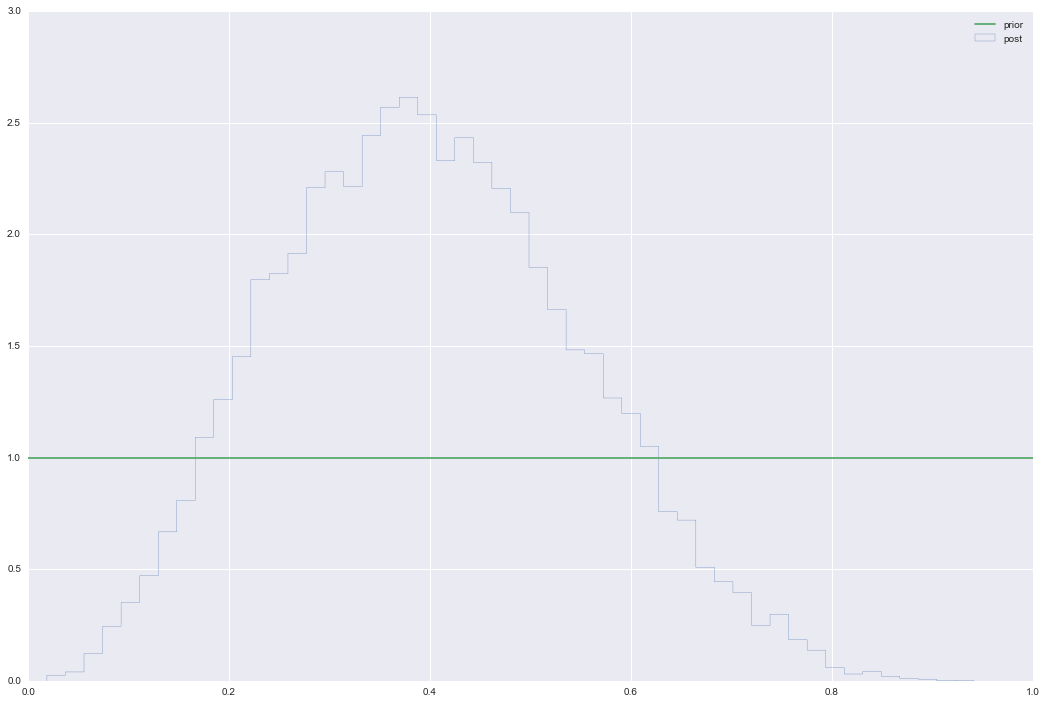

In [17]:
plt.figure(figsize=(18, 12))
mc.sample(iter=51000, burn=10000)
plt.hist(p.trace(), 50, histtype='step', normed=True, label='post');
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

### Question 3 cont:  
What is the maximum you would rationally pay, to win $30 if the next signal emitted is ‘false’?



       Have 30 . know only: of previous 8 signals 3 were false. So EV on  $30 would be 3/8 of  $30. This is $11.25
       
       if had other information that signals evened out over time could go to 50% but just this evidence would stick 
       to 11.25 if being rational  - can see this ish from graph above

### 4. Business modeling

 An online retailer has asked you to help figure out the maximum amount they should bid on
ads to bring a user to their site.

 They want to know how much they should pay for each ad
click in future. 

 You want to make as many sales as possible while breaking even (you are not
trying to maximise profit, you are optimizing for market penetration instead).

   The average value of an order, for users who actually order, can be described by normal
    distribution with mean $30 and standard deviation 5.

 However, not everybody who clicks on the ad subsequently orders.

 We are not sure of the exact conversion rate - but our prior which we’ll use is that the
probability of a user ordering, given that they click on the ad and visit the site, can be described
by a beta distribution, beta(alpha=2,beta=5) (i.e. we think conversion rates are low, about
16% on average).

 Use pymc to make a model of the above situation.

 Use pymc to plot your prior distributions. Then plot the distribution of how much money the
average click will bring in. (This will tell us how much we can afford to pay for the average
click. 
 Assume no costs other than customer acquisition.)
 
 How much can we afford to pay?

 What if we are worried about being unlucky - how much can we conservatively afford to pay?
(Let’s say we want to have a 90% chance of breaking even.)


#### model

            (you are not trying to maximise profit, you are optimizing 
            for market penetration instead).

     
        
      How much can we afford to pay?
            What if we are worried about being unlucky - how much can 
            we conservatively afford to pay? (Let’s say we want to have 
            a 90% chance of breaking even.


        can afford to pay 30* 0.16 per click: $4.80
        
        e.g. if 6000 clicks => (6000*.16) buyers ie 960 buyers 
        960 buyers at 30 each average = 28000
        28000/6000 = 4.80 (this is assuming average sale of 30 is correct)
            
        If want 90% chance of breaking even would assume average sale of 
        27 dollars not 30 therefore max per click to pay will be:
                (27*.16) = $4.32 per click
        
        

#### Q4:How much can we afford to pay?

Answer:

            can afford to pay 30* 0.16 per click: $4.80 (Check: can see
                        this from graph: 'how much money the average click
                        will bring in' below)

    e.g. if 6000 clicks => (6000*.16) buyers ie 960 buyers 
    960 buyers at 30 each average = 28000
    28000/6000 = 4.80 (this is assuming average sale of 30 is correct)
    
  

#### Q4:Worried about being unlucky?   
    What if we are worried about being unlucky - how much can 
    we conservatively afford to pay? (Let’s say we want to have 
    a 90% chance of breaking even.
    
 Answer   

    If want 90% chance of breaking even would assume average sale of 
    27 dollars not 30 therefore max per click to pay will be:
            (27*.16) = $4.32 per click
            This plotted too below and can see difference

In [ ]:
# prior for buyer ie conversion rate
alpha = 2
beta = 5
p = pymc.Beta('p', alpha=alpha, beta=beta)

In [ ]:
# plot conversion rate prior 
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

In [18]:
# how much spent
mu = 30
tau = 1./(5**2)

mu = pymc.Normal('mu', mu=mu,tau=tau)
tau = pymc.Normal('tau')

q = pymc.Normal('q', mu=mu, tau=tau) #here is just mean 30 - sd 5 

@pymc.deterministic
def av_income_per_click(q=q,p=p): # average purchase,q ; num buyers,p  
    return q*p   # 


 [-----------------100%-----------------] 51000 of 51000 complete in 9.7 sec

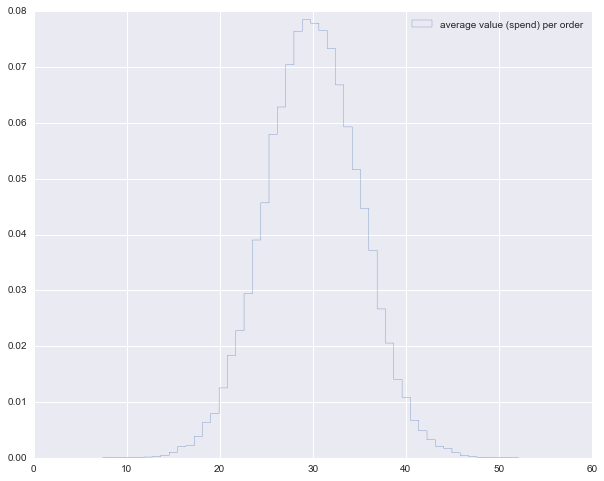

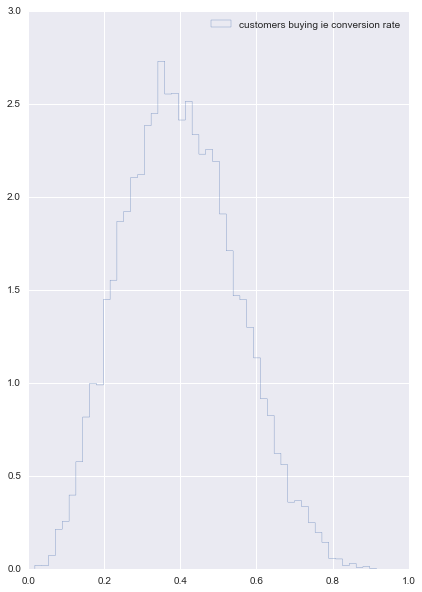

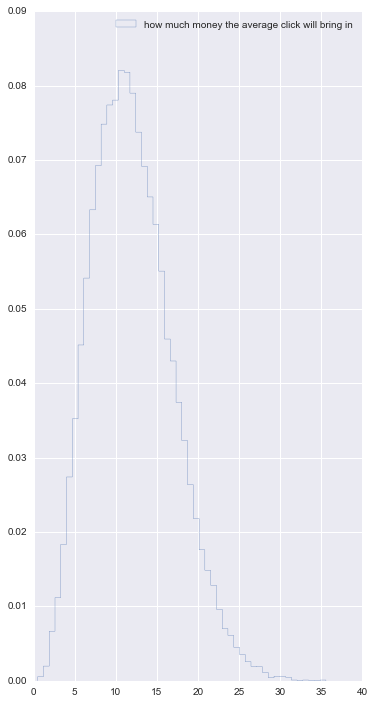

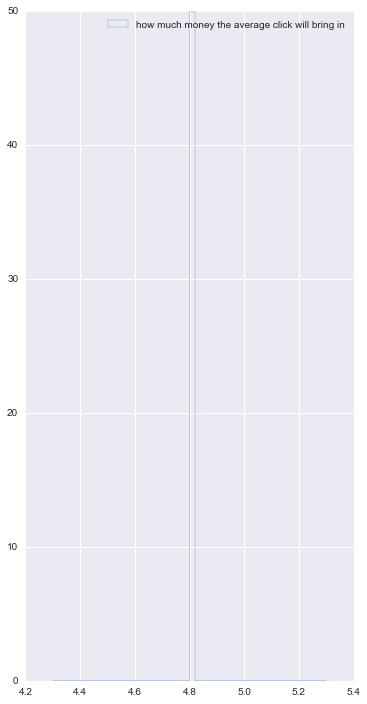

In [20]:
#model and plot distributions

m = pymc.Model([q,p,av_income_per_click])
mc = pymc.MCMC(m, )
mc.sample(iter=51000, burn=10000)

#average sales 
plt.figure(figsize=(10,8))
plt.subplot(111)
plt.hist(q.trace(), 50, histtype='step', normed=True, label='average value (spend) per order');
plt.legend(loc='best');

#conversion rate clicks:sales - customers buying
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.hist(p.trace(), 50, histtype='step', normed=True, label='customers buying ie conversion rate');
plt.legend(loc='best');

#how much to pay per click ie how much money average click will bring in
plt.figure(figsize=(20,12))
plt.subplot(131)
plt.hist(av_income_per_click.trace(), 50, histtype='step', normed=True, label='how much money the average click will bring in');
plt.legend(loc='best');

#how much to pay per click ie how much money average click will bring in
plt.figure(figsize=(20,12))
plt.subplot(131)
plt.hist(30*.16, 50, histtype='step', normed=True, label='how much money the average click will bring in');
plt.legend(loc='best');

In [ ]:
# if being conservation
# how much spent
mu = 27   # 90% of 30 - will keep standard deviation of 5
tau = 1./(5**2)

mu = pymc.Normal('mu', mu=mu,tau=tau)
tau = pymc.Normal('tau')

q = pymc.Normal('q', mu=mu, tau=tau) #here is just mean 27 - sd 5 

@pymc.deterministic
def av_income_per_click(q=q,p=p): # average purchase,q ; num buyers,p  
    return q*p   # 




In [ ]:
#model and plot distributions - this time conservative 27 per spend

m = pymc.Model([q,p,av_income_per_click])
mc = pymc.MCMC(m, )
mc.sample(iter=51000, burn=10000)

#average sales 
plt.figure(figsize=(10,8))
plt.subplot(111)
plt.hist(q.trace(), 50, histtype='step', normed=True, label='average value (spend) per order now $27');
plt.legend(loc='best');

#conversion rate clicks:sales - customers buying
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.hist(p.trace(), 50, histtype='step', normed=True, label='customers buying ie conversion rate -same');
plt.legend(loc='best');

#how much to pay per click ie how much money average click will bring in
plt.figure(figsize=(20,12))
plt.subplot(131)
plt.hist(av_income_per_click.trace(), 50, histtype='step', normed=True, label='reduced money the average click may bring in');
plt.legend(loc='best');

### End of assignment

.

references:
   
    https://people.duke.edu/~ccc14/sta-663/PyMC2.html
    
    https://blog.dominodatalab.com/ab-testing-with-hierarchical-models-in-  python/
    
    https://healthyalgorithms.com/2008/11/26/mcmc-in-python-pymc-for- bayesian-probability/
    
    https://pymc-devs.github.io/pymc/modelbuilding.html and other chapters from here
    
    http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic- Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb
    
    https://www.youtube.com/watch?v=ssVsVhZEQ9M
    
    https://www.youtube.com/watch?v=XbxIo7ScVzc
    

.

.

#### working area below here

### 4. Business modeling
 An online retailer has asked you to help figure out the maximum amount they should bid on
ads to bring a user to their site.

 They want to know how much they should pay for each ad
click in future. 

 You want to make as many sales as possible while breaking even (you are not
trying to maximise profit, you are optimizing for market penetration instead).

   The average value of an order, for users who actually order, can be described by normal
    distribution with mean $30 and standard deviation 5.

 However, not everybody who clicks on the ad subsequently orders.

 We are not sure of the exact conversion rate - but our prior which we’ll use is that the
probability of a user ordering, given that they click on the ad and visit the site, can be described
by a beta distribution, beta(alpha=2,beta=5) (i.e. we think conversion rates are low, about
16% on average).

 Use pymc to make a model of the above situation.

 Use pymc to plot your prior distributions. Then plot the distribution of how much money the
average click will bring in. (This will tell us how much we can afford to pay for the average
click. 
 Assume no costs other than customer acquisition.)
 
 How much can we afford to pay?

 What if we are worried about being unlucky - how much can we conservatively afford to pay?
(Let’s say we want to have a 90% chance of breaking even.)




 model

            (you are not trying to maximise profit, you are optimizing 
            for market penetration instead).

    graphs needed:
    
        1. normal distribution for average value of order
        
        2. average value distribution
        
        3. beta distribution for ordering
        
        4. average click distribution
        



In [ ]:
# prior for buyer  Q4
alpha = 2
beta = 5
p = pymc.Beta('p', alpha=alpha, beta=beta)

In [ ]:
# plot prior for Q4
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior');
plt.legend(loc='best');

In [ ]:
#  too contrived approx fine
@pymc.deterministic
def buyers(p=p): # better approximation to 16% but approx so doesnt matter
    return p/1.05   # 

m = pymc.Model([buyers,p])
mc = pymc.MCMC(m, )
mc.sample(iter=51000, burn=10000)



plt.figure(figsize=(10,8))
plt.hist(buyers.trace(), 50, histtype='step', normed=True, label='');
plt.legend(loc='best');


In [ ]:
# think this distribution might be better
alpha1 = 2
beta1 = 6
p = pymc.Beta('p', alpha=alpha1, beta=beta1)


In [ ]:
# plot prior for this new dist
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha1, beta1), label='prior');
plt.legend(loc='best');

In [ ]:
#  for how much spent Q4
mu = 30
tau = 1./(5**2)

mu = pymc.Normal('mu', mu=mu,tau=tau)
tau = pymc.Normal('tau')




q = pymc.Normal('q', mu=mu, tau=tau) #here is just mean 30 - sd 5 

@pymc.deterministic
def income_per_click(q=q,buyers=buyers):
    return q*buyers


In [ ]:
m = pymc.Model([q,p,income_per_click])
mc = pymc.MCMC(m, )
mc.sample(iter=51000, burn=10000)



plt.figure(figsize=(10,8))
plt.subplot(111)
plt.hist(q.trace(), 50, histtype='step', normed=True, label='average value per order');
plt.legend(loc='best');

 
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.hist(av_income_per_click.trace(), 50, histtype='step', normed=True, label='average value per click');
plt.legend(loc='best');




.

Notes:







Expected Value
http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb
    Expected value (EV) is one of the most important concepts in probability. 

    The EV for a given probability distribution can be described as "the mean value in the long run for many repeated samples from that distribution." 

    To borrow a metaphor from physics, a distribution's EV as like its "center of mass." Imagine repeating the same experiment many times over, and taking the average over each outcome. 
    The more you repeat the experiment, the closer this average will become to the distributions EV. 

    (side note: as the number of repeated experiments goes to infinity, the difference between the average outcome and the EV becomes arbitrarily small.)
    
    
    
    
http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb

B. Cronin [5] has a very motivating description of probabilistic programming:

Another way of thinking about this: unlike a traditional program, which only runs in the forward directions, a probabilistic program is run in both the forward and backward direction. It runs forward to compute the consequences of the assumptions it contains about the world (i.e., the model space it represents), but it also runs backward from the data to constrain the possible explanations. In practice, many probabilistic programming systems will cleverly interleave these forward and backward operations to efficiently home in on the best explanations.